In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

### Read df from cleaned csv

In [13]:
df = pd.read_csv('../data/house_data_cleaned.csv')

In [14]:
df.head()

,Id,MSSubClass,MSZoning,Street,Alley,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,...,TotalBsmtSF,Heating,GrLivArea,KitchenQual,GarageType,GarageFinish,GarageCars,SalePrice,TotalSF,HasPool
0,1,60,RL,Pave,None,CollgCr,Norm,Norm,2Story,7,...,856,GasA,1710,Gd,Attchd,RFn,2,208500,2566,False
1,2,20,RL,Pave,None,Veenker,Feedr,Norm,1Story,6,...,1262,GasA,1262,TA,Attchd,RFn,2,181500,2524,False
2,3,60,RL,Pave,None,CollgCr,Norm,Norm,2Story,7,...,920,GasA,1786,Gd,Attchd,RFn,2,223500,2706,False
3,4,70,RL,Pave,None,Crawfor,Norm,Norm,2Story,7,...,756,GasA,1717,Gd,Detchd,Unf,3,140000,2473,False
4,5,60,RL,Pave,None,NoRidge,Norm,Norm,2Story,8,...,1145,GasA,2198,Gd,Attchd,RFn,3,250000,3343,False


### Figure 1 - Correlation of SalePrice to TotalsSF

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


correlation : (0.7822600527979842, 5.511173086257728e-302)


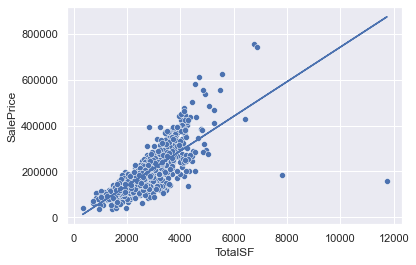

In [15]:
model = sm.OLS(df['SalePrice'], sm.add_constant(df['TotalSF']))
p = model.fit().params
# generate x-values for your regression line (two is sufficient)
x = df['TotalSF']
# scatter-plot data
ax = sns.scatterplot(x='TotalSF', y='SalePrice',data=df)
# plot regression line on the same axes, set x-axis limits
ax.plot(x, p.const + p['TotalSF'] * x)
print ("correlation :",scipy.stats.pearsonr(df['SalePrice'], df['TotalSF']))

### Figure 2.1 - Correlation of SalePrice to TotalsSF w/ pools

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


correlation : (0.16802605710441615, 0.7187596908749201)


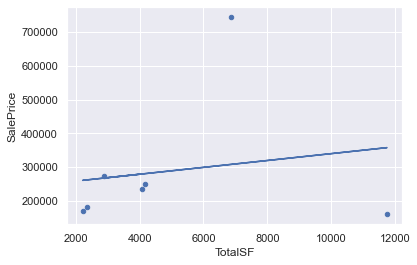

In [16]:
pool_model = sm.OLS(df[df['HasPool'] == True]['SalePrice'], sm.add_constant(df[df['HasPool'] == True]['TotalSF']))
pool_p = pool_model.fit().params
# generate x-values for your regression line (two is sufficient)
x = df[df['HasPool'] == True]['TotalSF']
# scatter-plot data
ax = df[df['HasPool'] == True].plot(x='TotalSF', y='SalePrice', kind='scatter')
# plot regression line on the same axes, set x-axis limits
ax.plot(x, pool_p.const + pool_p['TotalSF'] * x)
print ("correlation :",scipy.stats.pearsonr(df[df['HasPool'] == True]['SalePrice'], df[df['HasPool'] == True]['TotalSF']))

### Figure 2.2 - Correlation of SalePrice to TotalsSF w/o pools

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


correlation : (0.8166448166913953, 0.0)


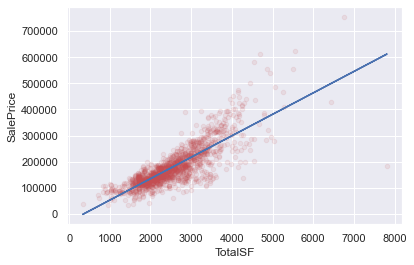

In [17]:
no_pool_model = sm.OLS(df[df['HasPool'] == False]['SalePrice'], sm.add_constant(df[df['HasPool'] == False]['TotalSF']))
no_pool_p = no_pool_model.fit().params
# generate x-values for your regression line (two is sufficient)
x = df[df['HasPool'] == False]['TotalSF']
# scatter-plot data
ax = df[df['HasPool'] == False].plot(x='TotalSF', y='SalePrice', kind='scatter', alpha = 0.1, c='r')
# plot regression line on the same axes, set x-axis limits
ax.plot(x, no_pool_p.const + no_pool_p['TotalSF'] * x)
print ("correlation :",scipy.stats.pearsonr(df[df['HasPool'] == False]['SalePrice'], df[df['HasPool'] == False]['TotalSF']))

### Figure 2.3 - Correlation of SalePrice to TotalsSF w/ pools after correcting outlier at index 1298

Before update : 160000
After update : 1600000


/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


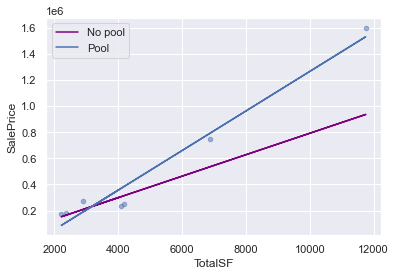

correlation w/ pools : (0.9809888892055241, 9.474037124304883e-05)


In [18]:
# One thing that stands out is how greatly the outliers affect the dataset that has a pool. So I will 
# re-run the regression, excluding those data points.
print('Before update : \033[1;48;34m' + str(df.iloc[1298]['SalePrice'])) 
# I have come to the conclusion that this outlier must be missing a zero on price. I say this because the
# indicators I have found to have strong correlations with price, for instance Area is very high, and the 
# Quality measures such as kitchen quality and Overall Style, are maximum values. The only value that
# doesn't fit the data is the sale price. So I will update it to $1.6 million.
df.at[1298,'SalePrice'] = 1600000
print('\033[mAfter update : \033[1;48;34m' + str(df.iloc[1298]['SalePrice']))
# Now to run it again.
pool_model = sm.OLS(df[df['HasPool'] == True]['SalePrice'], 
    sm.add_constant(df[df['HasPool'] == True]['TotalSF']))
pool_p = pool_model.fit().params
# generate x-values for your regression line (two is sufficient)
x = df[df['HasPool'] == True]['TotalSF']
# scatter-plot data
ax = df[df['HasPool'] == True].plot(x='TotalSF', y='SalePrice', kind='scatter', alpha = 0.5)
# plot regression line on the same axes, set x-axis limits
line1, = ax.plot(x, no_pool_p.const + no_pool_p['TotalSF'] * x, c='purple')
line2, = ax.plot(x, pool_p.const + pool_p['TotalSF'] * x)
ax.legend([line1, line2],['No pool','Pool'])
plt.show()
print ("\033[mcorrelation w/ pools :\033[1;48;34m",scipy.stats.pearsonr(df[df['HasPool'] == True]['SalePrice'], \
    df[df['HasPool'] == True]['TotalSF']))

### Figure 2.4 - Correlation of SalePrice to TotalsSF w/o pools after correcting outlier at index 1298

/Users/skdod/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


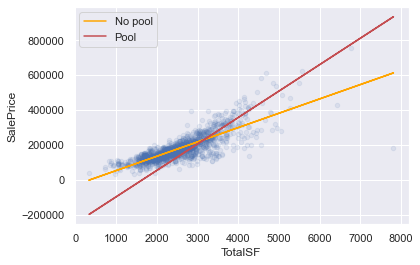

correlation with pool: (0.9809888892055241, 9.474037124304883e-05)
correlation without pool: (0.8166448166913953, 0.0)


In [19]:
no_pool_model = sm.OLS(df[df['HasPool'] == False]['SalePrice'], sm.add_constant(df[df['HasPool'] == False]['TotalSF']))
no_pool_p = no_pool_model.fit().params
x = df[df['HasPool'] == False]['TotalSF']
ax = df[df['HasPool'] == False].plot(x='TotalSF', y='SalePrice', kind='scatter', alpha = 0.1)
line1, = ax.plot(x, no_pool_p.const + no_pool_p['TotalSF'] * x, c='orange')
line2, = ax.plot(x, pool_p.const + pool_p['TotalSF'] * x, c='r')
ax.legend([line1, line2],['No pool','Pool'])
plt.show()
print ("correlation with pool:",scipy.stats.pearsonr(df[df['HasPool'] == True]['SalePrice'], df[df['HasPool'] == True]['TotalSF']))
print ("correlation without pool:",scipy.stats.pearsonr(df[df['HasPool'] == False]['SalePrice'], df[df['HasPool'] == False]['TotalSF']))

### Explore neighborhood statistics, particularly how Edwards neighborhoods compares to the others.
###### Note that the correlation for homes with pools more closely matches after increasing the sale price of our outlier by a factor of 10.

In [ ]:
nb_mean_dict = {}
print('Mean\n')
for nb in df['Neighborhood']:    
    nb_mean_dict[nb]= df[df['Neighborhood'] == nb]['SalePrice'].mean()
for idx, x in enumerate(sorted(nb_mean_dict.items(), key=lambda item: -item[1])):
    print(str(idx + 1) + '. ' + str(x[0]) +' - $ ' + '{:,.0f}'.format(x[1]) if \
          x[0] != 'Edwards' else str(idx + 1) + '. ' + '\033[1;48;34m' + str(x[0]) + \
          ' - $ ' + '{:,.0f}'.format(x[1]) + '\033[m')
print('\nMedian\n')
nb_median_dict = {}
for nb in df['Neighborhood']:    
    nb_median_dict[nb]= df[df['Neighborhood'] == nb]['SalePrice'].median()

for idx, x in enumerate(sorted(nb_median_dict.items(), key=lambda item: -item[1])):
    print(str(idx + 1) + '. ' + str(x[0]) +' - $ ' + '{:,.0f}'.format(x[1]) if \
          x[0] != 'Edwards' else str(idx + 1) + '. ' + '\033[1;48;34m' + str(x[0]) + \
          ' - $ ' + '{:,.0f}'.format(x[1]) + '\033[m')
print('\nMinimum\n')
nb_min_dict = {}
for nb in df['Neighborhood']:    
    nb_min_dict[nb]= df[df['Neighborhood'] == nb]['SalePrice'].min()
for idx, x in enumerate(sorted(nb_min_dict.items(), key=lambda item: -item[1])):
    print(str(idx + 1) + '. ' + str(x[0]) +' - $ ' + '{:,.0f}'.format(x[1]) if \
          x[0] != 'Edwards' else str(idx + 1) + '. ' + '\033[1;48;34m' + str(x[0]) + \
          ' - $ ' + '{:,.0f}'.format(x[1]) + '\033[m')
print('\nMaximum\n')
nb_max_dict = {}
for nb in df['Neighborhood']:    
    nb_max_dict[nb]= df[df['Neighborhood'] == nb]['SalePrice'].max()

for idx, x in enumerate(sorted(nb_max_dict.items(), key=lambda item: -item[1])):
    print(str(idx + 1) + '. ' + str(x[0]) +' - $ ' + '{:,.0f}'.format(x[1]) if \
          x[0] != 'Edwards' else str(idx + 1) + '. ' + '\033[1;48;34m' + str(x[0]) + \
          ' - $ ' + '{:,.0f}'.format(x[1]) + '\033[m')

Mean



In [ ]:
# There is another outlier that I believe is also an inaccuracy. The neighborhood is the same as the 
# outlier I previously revealed. The neighborhood is relatively inexpensive. It's also in the Edwards 
# neighborhood, which stands out from others.
print(df[df['TotalSF'] > 7000])
print(df.iloc[523])
print(df.iloc[1298])

In [ ]:
# I want to compare these locations further with the data from the original df.
orig_df = pd.read_csv('../train.csv')
print(orig_df.iloc[[523,1298]].select_dtypes('int64'))

### Figure 3 - Correlation of LotArea to SalePrice

In [ ]:
model = sm.OLS(orig_df['SalePrice'], sm.add_constant(orig_df['LotArea']))
p = model.fit().params
# generate x-values for your regression line (two is sufficient)
x = orig_df['LotArea']
# scatter-plot data
ax = orig_df.plot(x='LotArea', y='SalePrice', kind='scatter', alpha = 0.1)
# plot regression line on the same axes, set x-axis limits
ax.plot(x, p.const + p['LotArea'] * x)
print ("correlation :",scipy.stats.pearsonr(orig_df['SalePrice'], orig_df['LotArea']))

In [ ]:
# These two homes are very large, on large plots of land, and brand new, so I believe that 
# the value is once again low by a factor of 10.
df.at[523,'SalePrice'] = 10 * df.iloc[523]['SalePrice']

In [ ]:
# Looking back on the original df at the correlation of sale price and lot area, there is a decent
# correlation. Now we will examine all values with large LotArea's defined as greater than 40,000.
orig_df = pd.read_csv('../train.csv')
# --- Uncomment below to examine the resulting df for yourself.
# --- print(orig_df[orig_df['LotArea'] > 40000].select_dtypes('int64'))
print(df.iloc[[523,769,1298]].select_dtypes('int64'))
'{:,.0f}'.format(orig_df.LotArea.mean())

### Figure 4 - Correlation of SalePrice and TotalSF among 3 outliers within LotArea

In [ ]:
# An interesting find was a home with a much larger lot area, but only about a third of the price of our 
# other two extreme values.
model = sm.OLS(df.iloc[[523,769,1298]]['SalePrice'], sm.add_constant(df.iloc[[523,769,1298]]['TotalSF']))
p = model.fit().params
x = df.iloc[[523,769,1298]]['TotalSF']
ax = df.iloc[[523,769,1298]].plot(x='TotalSF', y='SalePrice', kind='scatter', alpha = 0.5)
ax.plot(x, p.const + p['TotalSF'] * x)
print ("correlation :",scipy.stats.pearsonr(df.iloc[[523,769,1298]]['SalePrice'], df.iloc[[523,769,1298]]['TotalSF']))

In [ ]:
# The above isn't technically a statistically significant result, however, it is largely 
# inline with our correlation of SalePrice to TotalSF overall. 
orig_df[orig_df['Neighborhood'] == 'Edwards'].groupby('SaleCondition').SalePrice.count()

### Figure 5 - Correlation of SalePrice and TotalSF after outlier SalePrice 
#### updated values increased by a factor of 10

In [ ]:
# These two changes showed an increase on the correlation coefficient of SalePrice and TotalSF.
model = sm.OLS(df['SalePrice'], sm.add_constant(df['TotalSF']))
p = model.fit().params
# generate x-values for your regression line (two is sufficient)
x = df['TotalSF']
# scatter-plot data
ax = df.plot(x='TotalSF', y='SalePrice', kind='scatter', alpha = 0.1)
# plot regression line on the same axes, set x-axis limits
ax.plot(x, p.const + p['TotalSF'] * x, c='r')
print ("correlation :",scipy.stats.pearsonr(df['SalePrice'], df['TotalSF']))

In [ ]:
# The two outliers make more sense, in terms of the dataset now, thought they skew the data significantly.
df.columns

### Examine all 3-dimensional correlations between all numeric columns and SalePrice and TotalSF

In [ ]:
for col in df.select_dtypes('int64').drop(columns=['Id','TotalSF','SalePrice']).columns:    
    sns.set(style = "darkgrid")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    x = df[col]
    y = df['TotalSF']
    z = df['SalePrice']

    ax.set_xlabel(col)
    ax.set_ylabel("SF")
    ax.set_zlabel("Price")

    ax.scatter(x, y, z, c='g')

    plt.show()

In [ ]:
# Another thing that stands out to me is the correlation of GarageCars and SF and Price, except for 4. So I
# am going to combine 4 into the column 3.
df['GarageCars'].replace(to_replace=4, value=3, inplace=True)
df['GarageCars'].unique()

### Figure 6 - Correlation of GarageCars, TotalSF and SalePrice

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['GarageCars']
y = df['TotalSF']
z = df['SalePrice']

ax.set_xlabel('GarageCars')
ax.set_ylabel("SF")
ax.set_zlabel("Price")

ax.scatter(x, y, z, c='g')

plt.show()

### Correlations of SalePrice and TotalSf by OverallQual

In [ ]:
# One observation I've made is that each variable is pretty strongly correlated for lower values, 
# but I believe this will be explained in some of the qualitative variables.
for value in df.OverallQual.unique():
    col_model = sm.OLS(df[df['OverallQual'] == value]['SalePrice'], sm.add_constant(df[df['OverallQual'] == value]['TotalSF']))
    col_p = col_model.fit().params
    x = df[df['OverallQual'] == value]['TotalSF']
    ax = df[df['OverallQual'] == value].plot(x='TotalSF', y='SalePrice', kind='scatter', alpha = 0.5, title=value)
    corrcoef = scipy.stats.pearsonr(df[df['OverallQual'] == value]['SalePrice'], df[df['OverallQual'] == value]['TotalSF'])
    if(np.abs(corrcoef[0]) > .2):
        print(value, " correlation : ",corrcoef)

In [ ]:
# Overall Condition values over above three yeild strong correlations between SalePrice and TotalSF. 
print(df[(df['SalePrice'] > 35000) & (df['SalePrice'] < 61000) & (df['TotalSF'] > 700) & (df['TotalSF'] < 1000)])

### Figure 7 - Correlation of TotalSF and SalePrice, 
#### restricted to SalePrice under $100,000 and TotalSF under 1400

In [ ]:
# What I see above is that the first value, with id 711, Each of them seems to correlate roughly 
# between neighborhood mean values to sale price. IDOTRR is the cheapest average price of the 3, 
# and the home in that neighborhood is also the cheapest, and SWISU is the most expensive of the
# 3 on average, and the home in SWISU is the most expensive, despite being the smallest. I believe
# the appearance of these values as outliers is explained by the neighborhoods they are in, and 
# therefore they fit the dataset fairly well overall.
restricted_df = df[(df['SalePrice'] < 100000) & (df['TotalSF'] < 1400)]
model = sm.OLS(restricted_df['SalePrice'], sm.add_constant(restricted_df['TotalSF']))
p = model.fit().params
# generate x-values for your regression line (two is sufficient)
x = restricted_df['TotalSF']
# scatter-plot data
ax = restricted_df.plot(x='TotalSF', y='SalePrice', kind='scatter', alpha = 0.1)
# plot regression line on the same axes, set x-axis limits
ax.plot(x, p.const + p['TotalSF'] * x)
print ("correlation :",scipy.stats.pearsonr(restricted_df['SalePrice'], restricted_df['TotalSF']))

##### As we see above, the restricted correlation is not strong, nor as statistically significant, as the 
##### dataset as a whole.

### Figure 8 - Correlation of TotalSF and SalePrice, restricted to those homes under $300,000

In [ ]:
restricted_df = df[df['SalePrice'] < 300000]
model = sm.OLS(restricted_df['SalePrice'], sm.add_constant(restricted_df['TotalSF']))
p = model.fit().params
x = restricted_df['TotalSF']
ax = restricted_df.plot(x='TotalSF', y='SalePrice', kind='scatter', alpha = 0.1)
ax.plot(x, p.const + p['TotalSF'] * x)
print ("correlation :",scipy.stats.pearsonr(restricted_df['SalePrice'], restricted_df['TotalSF']))

### Scatterplots to examine the correlation of TotalSF and SalePrice

In [ ]:
# The correlation seems to be more quadratic than linear, which seems to suggest that neighborhood, as
# seen above, plays a role in both total sf and sale price, which I now hypothesize causes this affect.
# I will now loop over neighborhoods to view the correlation of area and sale price.
for value in sorted(df.Neighborhood.unique()):
    col_model = sm.OLS(df[df['Neighborhood'] == value]['SalePrice'], sm.add_constant(df[df['Neighborhood'] == value]['TotalSF']))
    col_p = col_model.fit().params
    x = df[df['Neighborhood'] == value]['TotalSF']
    ax = df[df['Neighborhood'] == value].plot(x='TotalSF', \
        y='SalePrice', kind='scatter', alpha = 0.5, \
        title= str(df[df['Neighborhood'] == value]['Id'].count()) \
        + ' - ' + value + ' - ${:,.2f}'.format(df[df['Neighborhood'] \
        == value]['SalePrice'].mean()))
    ax.plot(x, p.const + p['TotalSF'] * x)
    ax.plot(x, col_p.const + col_p['TotalSF'] * x)
    corrcoef = scipy.stats.pearsonr(df[df['Neighborhood'] == value]['SalePrice'], df[df['Neighborhood'] == value]['TotalSF'])
    if(np.abs(corrcoef[0]) > .2):
        print(value, " correlation : ",corrcoef)

### Figure 9.1 - Correlation of YearBuilt and SalePrice on the original dataset

In [ ]:
# I'd like to look more into my two major outliers in Edwards neighborhood, which I adjusted their
# values by a factor of 10. They were both newly built homes, of high quality, and very large size.
restricted_df = orig_df
model = sm.OLS(restricted_df['SalePrice'], sm.add_constant(restricted_df['YearBuilt']))
p = model.fit().params
x = restricted_df['YearBuilt']
ax = restricted_df.plot(x='YearBuilt', y='SalePrice', kind='scatter', alpha = 0.1)
ax.plot(x, p.const + p['YearBuilt'] * x)
print(p.const)
print ("correlation :",scipy.stats.pearsonr(restricted_df['SalePrice'], restricted_df['YearBuilt']))

### Figure 9.2 - Correlation of TotalSF and YearBuilt

In [ ]:
df['YearBuilt'] = orig_df['YearBuilt']
restricted_df = df
model = sm.OLS(restricted_df['TotalSF'], sm.add_constant(restricted_df['YearBuilt']))
p = model.fit().params
x = restricted_df['YearBuilt']
ax = restricted_df.plot(x='YearBuilt', y='TotalSF', kind='scatter', alpha = 0.1)
ax.plot(x, p.const + p['YearBuilt'] * x)
print ("correlation :",scipy.stats.pearsonr(restricted_df['TotalSF'], restricted_df['YearBuilt']))

### Figure 9.3 - Correlation of SalePrice and YearBuilt on updated dataset

In [ ]:
model = sm.OLS(df['SalePrice'], sm.add_constant(df['YearBuilt']))
p = model.fit().params
x = df['YearBuilt']
ax = df.plot(x='YearBuilt', y='SalePrice', kind='scatter', alpha = 0.1)
ax.plot(x, p.const + p['YearBuilt'] * x, c='red')
print(p.const)
print ("correlation :",scipy.stats.pearsonr(df['SalePrice'], df['YearBuilt']))

### Figure 9.4 - Quadratic regression of SalePrice and YearBuilt

In [ ]:
model = np.poly1d(np.polyfit(df['YearBuilt'], df['SalePrice'], 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(1870, 2008, 50)
plt.scatter(df['YearBuilt'], df['SalePrice'], alpha=.04)
plt.plot(polyline, model(polyline))
plt.xlim(1860,2020)
plt.ylim(100000,300000)
plt.show()

### Figure 9.5 - Quadratic regression of YearBuilt and TotalSF

In [ ]:
model = np.poly1d(np.polyfit(df['YearBuilt'], df['TotalSF'], 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(1870, 2008, 50)
plt.scatter(df['YearBuilt'], df['TotalSF'], alpha=.04)
plt.plot(polyline, model(polyline))
plt.xlim(1860,2020)
plt.ylim(2000,3500)
plt.show()

### Figure 9.6 - Quadratic regression of TotalSF And SalePrice

In [ ]:
model = np.poly1d(np.polyfit(df['TotalSF'], df['SalePrice'], 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(200, 12000, 50)
plt.scatter(df['TotalSF'], df['SalePrice'], alpha=.5)
plt.plot(polyline, model(polyline), c='r')
plt.xlim(0,12100)
plt.ylim(2000,2000000)
plt.plot(x, .76 * x)
plt.show()

In [ ]:
neighborhood_df = df.drop(columns=['Id','MSSubClass']).groupby('Neighborhood').mean()

scaled_neighborhood = scale(neighborhood_df.select_dtypes(['int64','float64']))
scaled_neighborhood_df = pd.DataFrame(scaled_neighborhood, columns=[neighborhood_df.select_dtypes(['int64','float64']).columns])
scaled_neighborhood_df_x = scaled_neighborhood_df
scaled_neighborhood_df_x.head()

### Figure 10.1

In [ ]:
neighborhood_pca = PCA().fit(scaled_neighborhood_df)
plt.subplots(figsize=(10, 6))
plt.plot(neighborhood_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');
neighborhood_pca_x = neighborhood_pca.transform(scaled_neighborhood)
neighborhood_pca_x.shape

### Figure 10.2

In [ ]:
x = neighborhood_pca_x[:, 0]
y = neighborhood_pca_x[:, 1]
neighborhood = df['Neighborhood'].unique()
pc_var = 100 * neighborhood_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Neighborhoods summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(neighborhood, x, y):
    plt.annotate(s, (x, y))

In [ ]:
print(df.groupby('Neighborhood').mean())
print(df[df['Neighborhood'] == 'Edwards'].mean())
print(orig_df[orig_df['Neighborhood'] == 'Edwards'].mean())

In [ ]:
# I notice that Edwards neighborhood is again an outlier, and I want to understand why. I will examine this
# further by replacing the updated values with the original values, and then running the above on the 
# original sale price column.

neighborhood_df = df.drop(columns=['Id','MSSubClass'])
neighborhood_df['SalePrice'] = orig_df['SalePrice']
neighborhood_df = neighborhood_df.groupby('Neighborhood').mean()
print(neighborhood_df.iloc[7])
scaled_neighborhood = scale(neighborhood_df.select_dtypes(['int64','float64']))
scaled_neighborhood_df = pd.DataFrame(scaled_neighborhood, columns=[neighborhood_df.select_dtypes(['int64','float64']).columns])
scaled_neighborhood_df_x = scaled_neighborhood_df
scaled_neighborhood_df_x.head()

### Figure 10.3

In [ ]:
neighborhood_pca = PCA().fit(scaled_neighborhood_df)
plt.subplots(figsize=(10, 6))
plt.plot(neighborhood_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');
neighborhood_pca_x = neighborhood_pca.transform(scaled_neighborhood)
neighborhood_pca_x.shape

### Figure 10.4

In [ ]:
x = neighborhood_pca_x[:, 0]
y = neighborhood_pca_x[:, 1]
neighborhood = df['Neighborhood'].unique()
pc_var = 100 * neighborhood_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Neighborhoods summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(neighborhood, x, y):
    plt.annotate(s, (x, y))

In [ ]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
sub_class_df = df.drop(columns=['Id']).groupby('MSSubClass').mean()

scaled_sub_class = scale(sub_class_df.select_dtypes(['int64','float64']))
scaled_sub_class_df = pd.DataFrame(scaled_sub_class, columns=[sub_class_df.select_dtypes(['int64','float64']).columns])
scaled_sub_class_df_x = scaled_sub_class_df
scaled_sub_class_df_x.head()

### Figure 11.1

In [ ]:
sub_class_pca = PCA().fit(scaled_sub_class_df)
plt.subplots(figsize=(10, 6))
plt.plot(sub_class_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');
sub_class_pca_x = sub_class_pca.transform(scaled_sub_class)
sub_class_pca_x.shape

Figure 11.2

In [ ]:
x = sub_class_pca_x[:, 0]
y = sub_class_pca_x[:, 1]
sub_class = df['MSSubClass'].unique()
pc_var = 100 * sub_class_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Neighborhoods summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(sub_class, x, y):
    plt.annotate(s, (x, y))

In [ ]:
# We see above that 160, which is newer 2-story homes and split foyer homes, 85, are possibly outliers.
# An obvious connection here is to area, which will be greater for 2-story homes. 

### Figure 12.1

In [ ]:
corr = df.select_dtypes(['int64','float64']).drop(columns=['Id']).corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
# I'm going to drop MasVnrArea as well now. Unlike year built, this isn't the 
# type of value that would be parabolic.
df.drop(columns=['MasVnrArea'], inplace = True)

### Figure 12.2

In [ ]:
corr = df.select_dtypes(['int64','float64']).drop(columns=['Id']).corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
datapath = '../data'
save_file(df, 'house_refined_data_cleaned.csv', datapath)